In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('fake_job_postings.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df = df.drop(['title','job_id','location','company_profile','description','requirements','benefits','salary_range'], axis=1)

In [6]:
df.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.shape

(17880, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           6333 non-null   object
 1   telecommuting        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   has_questions        17880 non-null  int64 
 4   employment_type      14409 non-null  object
 5   required_experience  10830 non-null  object
 6   required_education   9775 non-null   object
 7   industry             12977 non-null  object
 8   function             11425 non-null  object
 9   fraudulent           17880 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.4+ MB


## Handling missing values

In [9]:
df.isnull().sum()

department             11547
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
# List of categorical columns
cat_columns = ['department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Initialize SimpleImputer with 'most_frequent' strategy
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for categorical columns
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

In [12]:
df.head(50)

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Sales,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,Sales,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
6,ANDROIDPIT,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Sales,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
8,Sales,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Information Technology,0
9,Sales,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [13]:
df.isnull().sum()

department             0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Frequency encoding

In [14]:
features_to_encode = ['department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

In [15]:
for feature in features_to_encode:
    # Calculate frequency of each category
    frequency_map = df[feature].value_counts(normalize=True).to_dict()
    
    # Map frequencies to the original categories
    encoded_column_name = f"{feature}_freq_encoded"
    df[encoded_column_name] = df[feature].map(frequency_map)

In [16]:
df.drop(['department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1, inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,department_freq_encoded,employment_type_freq_encoded,required_experience_freq_encoded,required_education_freq_encoded,industry_freq_encoded,function_freq_encoded
0,0,1,0,0,0.022427,0.012696,0.021309,0.741051,0.371197,0.046421
1,0,1,0,0,0.000280,0.844016,0.062416,0.741051,0.046309,0.068736
2,0,1,0,0,0.676622,0.844016,0.607327,0.741051,0.371197,0.458837
3,0,1,0,0,0.676622,0.844016,0.607327,0.741051,0.076957,0.082103
4,0,1,1,0,0.676622,0.844016,0.607327,0.741051,0.027796,0.018904


In [17]:
df.shape

(17880, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   telecommuting                     17880 non-null  int64  
 1   has_company_logo                  17880 non-null  int64  
 2   has_questions                     17880 non-null  int64  
 3   fraudulent                        17880 non-null  int64  
 4   department_freq_encoded           17880 non-null  float64
 5   employment_type_freq_encoded      17880 non-null  float64
 6   required_experience_freq_encoded  17880 non-null  float64
 7   required_education_freq_encoded   17880 non-null  float64
 8   industry_freq_encoded             17880 non-null  float64
 9   function_freq_encoded             17880 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.4 MB


## Without upsampling

## Train-test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns=['fraudulent'], axis=1)
y = df['fraudulent']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 9)
(3576, 9)
(14304,)
(3576,)


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
rf_pred = rf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(rf_pred, y_test)
print('Accuracy using random forest, without upsampling is:', accuracy*100)

Accuracy using random forest, without upsampling is: 97.3993288590604


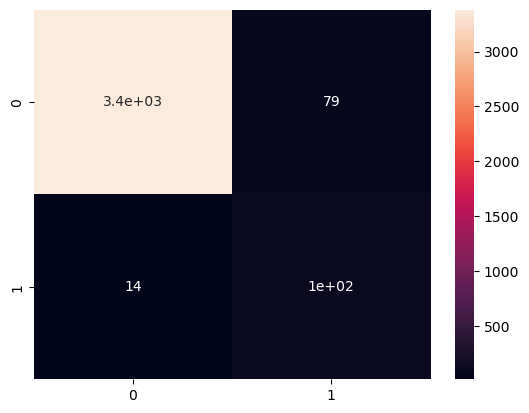

In [27]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(rf_pred, y_test)
sns.heatmap(rf_cm, annot=True, cbar=True);

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [29]:
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
nb_pred = nb.predict(X_test)

In [31]:
accuracy = accuracy_score(nb_pred, y_test)
print('Accuracy using naive bayes, without upsampling is:', accuracy*100)

Accuracy using naive bayes, without upsampling is: 91.38702460850112


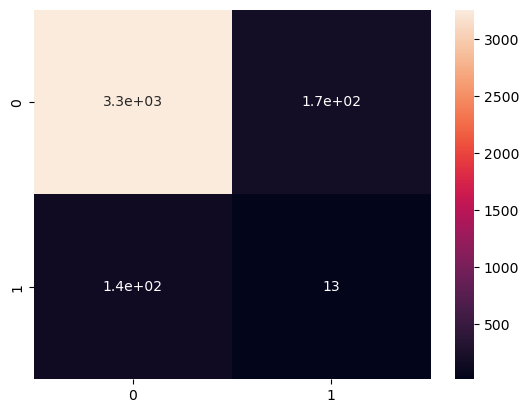

In [32]:
nb_cm = confusion_matrix(nb_pred, y_test)
sns.heatmap(nb_cm, annot=True, cbar=True);

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
lr_pred = lr.predict(X_test)

In [36]:
accuracy = accuracy_score(lr_pred, y_test)
print('Accuracy using logistic regression, without upsampling is:', accuracy*100)

Accuracy using logistic regression, without upsampling is: 94.93847874720358


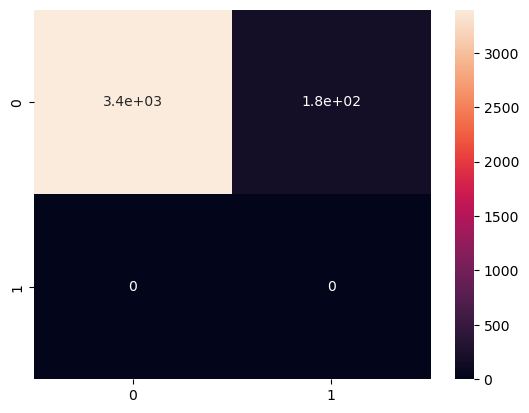

In [37]:
lr_cm = confusion_matrix(lr_pred, y_test)
sns.heatmap(lr_cm, annot=True, cbar=True);

## Upsampling

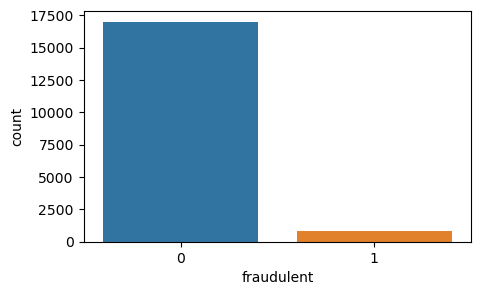

In [38]:
fig = plt.figure(figsize=(5,3))
chart = sns.countplot(x=df['fraudulent'])
plt.show()

In [39]:
X_fraudulent = df.drop(columns=['fraudulent'], axis=1)
y_fraudulent = df['fraudulent']

In [40]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="not majority")
X_resampled, y_resampled = oversample.fit_resample(X_fraudulent, y_fraudulent)

In [41]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [42]:
df_resampled.head()

,telecommuting,has_company_logo,has_questions,department_freq_encoded,employment_type_freq_encoded,required_experience_freq_encoded,required_education_freq_encoded,industry_freq_encoded,function_freq_encoded,fraudulent
0,0,1,0,0.022427,0.012696,0.021309,0.741051,0.371197,0.046421,0
1,0,1,0,0.000280,0.844016,0.062416,0.741051,0.046309,0.068736,0
2,0,1,0,0.676622,0.844016,0.607327,0.741051,0.371197,0.458837,0
3,0,1,0,0.676622,0.844016,0.607327,0.741051,0.076957,0.082103,0
4,0,1,1,0.676622,0.844016,0.607327,0.741051,0.027796,0.018904,0


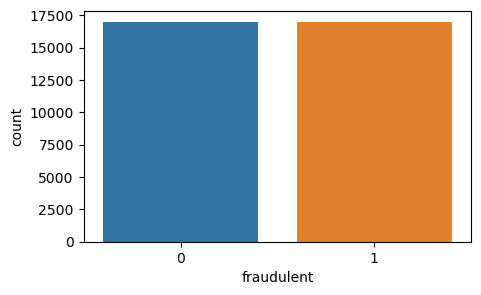

In [43]:
fig = plt.figure(figsize=(5,3))
chart = sns.countplot(x=df_resampled['fraudulent'])
plt.show()

## Train-test split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df_resampled.drop(columns=['fraudulent'], axis=1)
y = df_resampled['fraudulent']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27222, 9)
(6806, 9)
(27222,)
(6806,)


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rf_pred_up = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(rf_pred_up, y_test)
print('Accuracy using random forest, with upsampling is:', accuracy*100)

Accuracy using random forest, with upsampling is: 94.82809285924183


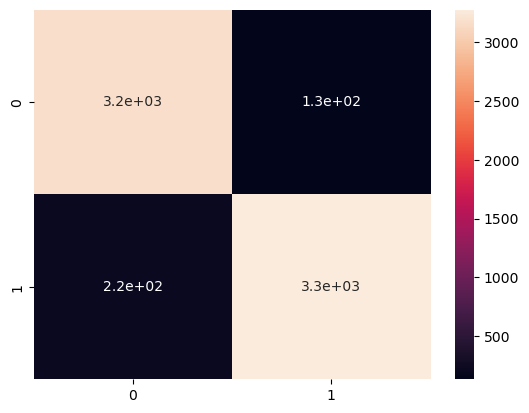

In [52]:
rf_cm = confusion_matrix(rf_pred_up, y_test)
sns.heatmap(rf_cm, annot=True, cbar=True);

## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [54]:
nb.fit(X_train, y_train)

GaussianNB()

In [55]:
nb_pred_up = nb.predict(X_test)

In [56]:
accuracy = accuracy_score(nb_pred_up, y_test)
print('Accuracy using naive bayes, with upsampling is:', accuracy*100)

Accuracy using naive bayes, with upsampling is: 74.36085806641199


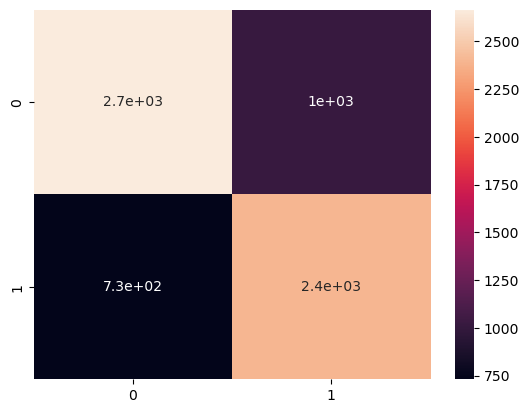

In [57]:
nb_cm = confusion_matrix(nb_pred_up, y_test)
sns.heatmap(nb_cm, annot=True, cbar=True);

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [59]:
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
lr_pred_up = lr.predict(X_test)

In [61]:
accuracy = accuracy_score(lr_pred_up, y_test)
print('Accuracy using logistic regression, with upsampling is:', accuracy*100)

Accuracy using logistic regression, with upsampling is: 76.10931531002058


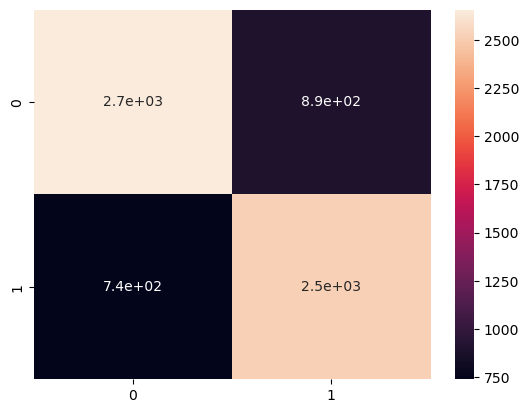

In [62]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(lr_pred_up, y_test)
sns.heatmap(lr_cm, annot=True, cbar=True);

## GridSearch CV
## 1.Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [69]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [81]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [82]:
rf_gcv = RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=200)
rf_gcv.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [83]:
rf_gcv_pred = rf_gcv.predict(X_test)

In [84]:
accuracy = accuracy_score(rf_gcv_pred, y_test)
print('Accuracy using random forest, with upsampling and gridsearch cv is:', accuracy*100)

Accuracy using random forest, with upsampling and gridsearch cv is: 89.42109903026741


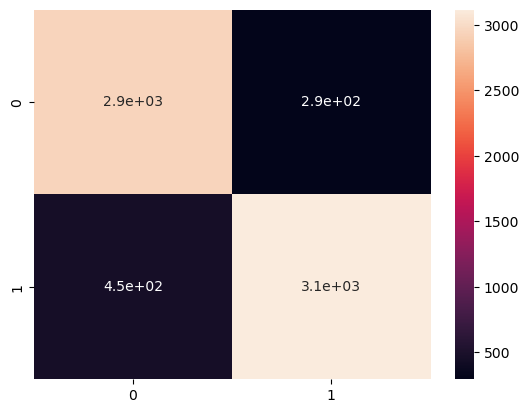

In [75]:
rf_gcv_cm = confusion_matrix(rf_gcv_pred, y_test)
sns.heatmap(rf_gcv_cm, annot=True, cbar=True);

## 2.Logistic Regression

In [78]:
param_grid_lr = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [79]:
CV_lrc = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv= 5)
CV_lrc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [85]:
CV_lrc.best_params_

{'C': 0.615848211066026,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [86]:
lr_gcv = LogisticRegression(C=0.615848211066026,max_iter=100,penalty='l2',solver='liblinear')

In [87]:
lr_gcv.fit(X_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [88]:
lr_gcv_pred = lr_gcv.predict(X_test)

In [89]:
accuracy = accuracy_score(lr_gcv_pred, y_test)
print('Accuracy using linear regression, with upsampling and gridsearch cv is:', accuracy*100)

Accuracy using linear regression, with upsampling and gridsearch cv is: 76.10931531002058
